<a href="https://colab.research.google.com/github/PPancham/PhD/blob/main/Scikit_Unsupervised_Machine_Learning_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <h1>Scikit Unsupervised Machine Learning Analysis</h1>

This is a program written in the Python programming language
which utilizes machine learning to process and classify ELISA data

This program is governed by MIT Liscence

Written in February, 2025 by Pranav Pancham and Tariq Tayebi


**K mean clustering with all data and No StandardScaler.**



In [ ]:

import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px
from google.colab import files
import joblib

uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]

data = pd.read_excel(fileName)

columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average', 'IgE Average', 'IgM Average']
X = data[columns_to_process]

def KmeansClustering(columns_to_process):
    silhouette_scores = {}

    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette_scores[k] = score
        print(f"K-Means Clusters: {k}, Silhouette Score: {score:.4f}")

    best_k = max(silhouette_scores, key=silhouette_scores.get)
    print(f"\nOptimal number of clusters (K-Means): {best_k}")
    best_k = 4  # Manually set
    print(f"\nK-Means Cluster value changed to: {best_k}")

    kmeanclusters = KMeans(n_clusters=best_k, random_state=42).fit_predict(X)
    data['kmeanclusters'] = kmeanclusters

    return kmeanclusters, best_k

# Perform clustering
kmeanclusters, best_k = KmeansClustering(columns_to_process)

def display_cluster_info(data, kmeanclusters):
     # Create cluster_df and print stats for cluster
      cluster_df = pd.DataFrame({ 'Group': data['Group'], 'Cluster': data['kmeanclusters']})
      print("\nCluster Statistics:")
      for cluster in range(best_k):
          # Get the data for the current cluster
          cluster_data = data[data['kmeanclusters'] == cluster][columns_to_process]  # Changed this line
          print(f"\nCluster {cluster}:")
          print(f"Number of samples: {len(cluster_data)}")
          print(f"Mean value: {cluster_data.mean().mean():.2f}")  # Mean of all features
          print(f"Standard deviation: {cluster_data.std().mean():.2f}")  # Std of all features
          print(f"Min value: {cluster_data.min().min():.2f}")
          print(f"Max value: {cluster_data.max().max():.2f}")

      # Show distribution summary
      print("\nDistribution of samples across clusters:")
      print(pd.crosstab(cluster_df['Group'], cluster_df['Cluster'])) # Changed this line


display_cluster_info(data, kmeanclusters)

Saving Biomarker_06032025_removed_swd.xlsx to Biomarker_06032025_removed_swd (2).xlsx
K-Means Clusters: 2, Silhouette Score: 0.3801
K-Means Clusters: 3, Silhouette Score: 0.3093
K-Means Clusters: 4, Silhouette Score: 0.2627
K-Means Clusters: 5, Silhouette Score: 0.2716
K-Means Clusters: 6, Silhouette Score: 0.2667
K-Means Clusters: 7, Silhouette Score: 0.2456
K-Means Clusters: 8, Silhouette Score: 0.2571
K-Means Clusters: 9, Silhouette Score: 0.2335

Optimal number of clusters (K-Means): 2

K-Means Cluster value changed to: 4

Cluster Statistics:

Cluster 0:
Number of samples: 56
Mean value: 0.04
Standard deviation: 0.01
Min value: -0.00
Max value: 0.21

Cluster 1:
Number of samples: 48
Mean value: 0.07
Standard deviation: 0.02
Min value: 0.00
Max value: 0.51

Cluster 2:
Number of samples: 124
Mean value: 0.05
Standard deviation: 0.01
Min value: -0.00
Max value: 0.27

Cluster 3:
Number of samples: 119
Mean value: 0.06
Standard deviation: 0.01
Min value: -0.00
Max value: 0.37

Distribut

**K mean clustering with removed Outlier data and StandardScaler.**

In [ ]:
from google.colab import files
import joblib
import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]

data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average', 'IgE Average','IgM Average']


def OutlierRemoval(data, columns):
    data_filtered = data.copy()

    for column in columns:
        Q1 = data_filtered[column].quantile(0.25)
        Q3 = data_filtered[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_filtered = data_filtered[(data_filtered[column] >= lower_bound) &
                                      (data_filtered[column] <= upper_bound)]

    return data_filtered

def KmeansClustering(scaled_features, columns_to_process):

    silhouette_scores = {}

    # Apply K-Means clustering for k values from 2 to 9
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(scaled_features)  # `scaled_features` should be your standardized dataset

        # Compute the silhouette score
        score = silhouette_score(scaled_features, clusters)
        silhouette_scores[k] = score  # Store the score

        print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

    # Choose the best number of clusters based on the highest Silhouette Score

    best_k = max(silhouette_scores, key=silhouette_scores.get)
    print(f"\nOptimal number of clusters: {best_k}")
    # best_k = 4
    print(f"\n cluster value changed to:  {best_k}" )
    # Re-run KMeans with the "best_k" or insert  value clusters and append results to the dataset
    clusters = KMeans(n_clusters= best_k, random_state=42).fit_predict(scaled_features)
    data['Cluster'] = clusters

    return clusters, best_k, scaled_features


# Remove outliers
data = OutlierRemoval(data, columns_to_process)
data.head()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[columns_to_process])

# Create K mean Clustering
clusters, best_k, scaled_features =KmeansClustering(scaled_features, columns_to_process)

def display_cluster_info(data, clusters):
     # Create cluster_df and print stats for cluster
      cluster_df = pd.DataFrame({ 'Group': data['Group'], 'Cluster': data['Cluster']})
      print("\nCluster Statistics:")
      for cluster in range(best_k):
          cluster_data = scaled_features[data['Cluster'] == cluster]
          print(f"\nCluster {cluster}:")
          print(f"Number of samples: {len(cluster_data)}")
          print(f"Mean value: {cluster_data.mean().mean():.2f}")  # Mean of all features
          print(f"Standard deviation: {cluster_data.std().mean():.2f}")  # Std of all features
          print(f"Min value: {cluster_data.min().min():.2f}")
          print(f"Max value: {cluster_data.max().max():.2f}")

      # Show distribution summary
      print("\nDistribution of samples across clusters:")
      print(pd.crosstab(cluster_df['Group'], cluster_df['Cluster']))


display_cluster_info(data, clusters)



Saving Biomarker_06032025_removed_swd.xlsx to Biomarker_06032025_removed_swd (4).xlsx
Clusters: 2, Silhouette Score: 0.1816
Clusters: 3, Silhouette Score: 0.1743
Clusters: 4, Silhouette Score: 0.1700
Clusters: 5, Silhouette Score: 0.1753
Clusters: 6, Silhouette Score: 0.1812
Clusters: 7, Silhouette Score: 0.1668
Clusters: 8, Silhouette Score: 0.1620
Clusters: 9, Silhouette Score: 0.1887

Optimal number of clusters: 9

 cluster value changed to:  9

Cluster Statistics:

Cluster 0:
Number of samples: 13
Mean value: -0.22
Standard deviation: 1.30
Min value: -2.07
Max value: 3.10

Cluster 1:
Number of samples: 31
Mean value: -0.13
Standard deviation: 0.72
Min value: -1.69
Max value: 2.19

Cluster 2:
Number of samples: 33
Mean value: 0.58
Standard deviation: 0.80
Min value: -1.10
Max value: 2.62

Cluster 3:
Number of samples: 25
Mean value: 0.05
Standard deviation: 1.21
Min value: -2.13
Max value: 3.41

Cluster 4:
Number of samples: 34
Mean value: -0.65
Standard deviation: 0.75
Min value: -

Saving Biomarker_06032025_removed_swd.xlsx to Biomarker_06032025_removed_swd (13).xlsx


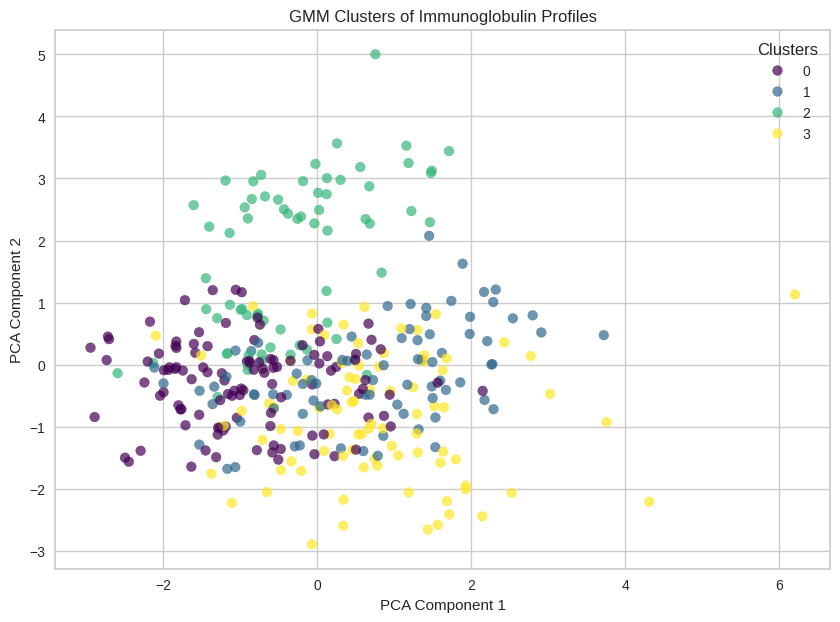

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]

data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average', 'IgE Average','IgM Average']
X = data[columns_to_process]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def GMMClustering(X_scaled):

    n_clusters = 4  # You can adjust or select based on model criteria
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    clusters = gmm.predict(X_scaled)
    data['Cluster'] = clusters

# Step 4: Visualize the clusters (optional but recommended)
def plotpc():
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('GMM Clusters of Immunoglobulin Profiles')
    plt.legend(*scatter.legend_elements(), title='Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()


GMMClustering(X_scaled)
plotpc()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Original data import - kept the same as in your code
from google.colab import files
uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]

data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average', 'IgE Average','IgM Average']
Group = data['Group']
X = data[columns_to_process]
# Assign 'Group' to 'y'
y = Group

# 1. Extract feature importances from supervised model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Print feature importances for reference
for i, feature in enumerate(columns_to_process):
    print(f"{feature}: {feature_importances[i]:.4f}")

# 2. Scale features by their importance
X_weighted = X * feature_importances

# 3. Initialize cluster centers with group means
# Identify unique groups in the data
unique_groups = sorted(y.unique())
print(f"Unique groups found: {unique_groups}")

initial_centers = []
for group in unique_groups:
    group_samples = X_weighted[y == group]
    initial_centers.append(group_samples.mean(axis=0))
initial_centers = np.array(initial_centers)

# 4. Perform k-means with specified initialization
n_clusters = len(unique_groups)
kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, random_state=42)
clusters = kmeans.fit_predict(X_weighted)

# 5. Evaluate alignment with true groups
ari = adjusted_rand_score(y, clusters)
print(f"Alignment with true groups (Adjusted Rand Index): {ari:.4f}")

# 6. Create a mapping between clusters and majority groups
cluster_group_map = {}
for cluster_id in range(n_clusters):
    cluster_mask = clusters == cluster_id
    if np.any(cluster_mask):
        cluster_labels = y[cluster_mask]
        unique_labels, counts = np.unique(cluster_labels, return_counts=True)
        majority_group = unique_labels[np.argmax(counts)]
        cluster_group_map[cluster_id] = majority_group
        print(f"Cluster {cluster_id} maps to group {majority_group} ({np.max(counts)}/{np.sum(counts)} samples)")

# 7. Create a confusion table between true groups and clusters
confusion_table = pd.crosstab(y, clusters, rownames=['True Group'], colnames=['Cluster'])
print("\nConfusion table (rows=true groups, columns=clusters):")
print(confusion_table)

# 8. Save results to dataframe
results = pd.DataFrame({
    'True_Group': y,
    'Cluster': clusters,
    'Mapped_Group': [cluster_group_map.get(c, "Unknown") for c in clusters]
})

# Add weighted feature values
for i, col in enumerate(columns_to_process):
    results[f"{col}_weighted"] = X[col] * feature_importances[i]

# Display match percentage
match_count = (results['True_Group'] == results['Mapped_Group']).sum()
match_percent = match_count / len(results) * 100
print(f"\nCluster assignment matches true group in {match_count}/{len(results)} cases ({match_percent:.2f}%)")

Saving Biomarker_06032025_removed_swd.xlsx to Biomarker_06032025_removed_swd (20).xlsx
IgG1 Average: 0.0972
IgG2 Average: 0.0856
IgG3 Average: 0.1642
IgG4 Average: 0.1451
IgA Average: 0.2233
IgE Average: 0.1681
IgM Average: 0.1165
Unique groups found: ['AD', 'Cognitive Negative', 'Cognitive Positive', 'MCI']
Alignment with true groups (Adjusted Rand Index): 0.0309
Cluster 0 maps to group Cognitive Negative (51/115 samples)
Cluster 1 maps to group Cognitive Negative (31/38 samples)
Cluster 2 maps to group Cognitive Positive (64/137 samples)
Cluster 3 maps to group Cognitive Negative (19/57 samples)

Confusion table (rows=true groups, columns=clusters):
Cluster              0   1   2   3
True Group                        
AD                  20   2  16  10
Cognitive Negative  51  31  34  19
Cognitive Positive  29   5  64  17
MCI                 15   0  23  11

Cluster assignment matches true group in 165/347 cases (47.55%)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Define outlier removal function
def OutlierRemoval(data, columns):
    data_filtered = data.copy()

    for column in columns:
        Q1 = data_filtered[column].quantile(0.25)
        Q3 = data_filtered[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_filtered = data_filtered[(data_filtered[column] >= lower_bound) &
                                      (data_filtered[column] <= upper_bound)]

    return data_filtered

# Original data import
from google.colab import files
uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]

data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average', 'IgE Average','IgM Average']

# Apply outlier removal to the data
print(f"Original data shape: {data.shape}")
data_filtered = OutlierRemoval(data, columns_to_process)
print(f"Data shape after outlier removal: {data_filtered.shape}")
print(f"Removed {data.shape[0] - data_filtered.shape[0]} outliers")

# Prepare data for modeling
X = data_filtered[columns_to_process]
y = data_filtered['Group']

# Print group distribution after outlier removal
print("\nGroup distribution after outlier removal:")
for group, count in y.value_counts().items():
    print(f"{group}: {count}")

# 1. Extract feature importances from supervised model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Print model accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"\nRandom Forest model accuracy - Train: {train_acc:.4f}, Test: {test_acc:.4f}")

# Print feature importances for reference
print("\nFeature importances:")
for i, feature in enumerate(columns_to_process):
    print(f"{feature}: {feature_importances[i]:.4f}")

# 2. Scale features by their importance
X_weighted = X * feature_importances

# 3. Initialize cluster centers with group means
unique_groups = sorted(y.unique())
print(f"\nUnique groups found: {unique_groups}")

initial_centers = []
for group in unique_groups:
    group_samples = X_weighted[y == group]
    initial_centers.append(group_samples.mean(axis=0))
initial_centers = np.array(initial_centers)

# 4. Perform k-means with specified initialization
n_clusters = len(unique_groups)
kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, random_state=42)
clusters = kmeans.fit_predict(X_weighted)

# 5. Evaluate alignment with true groups
ari = adjusted_rand_score(y, clusters)
print(f"Alignment with true groups (Adjusted Rand Index): {ari:.4f}")

# 6. Create a mapping between clusters and majority groups
cluster_group_map = {}
for cluster_id in range(n_clusters):
    cluster_mask = clusters == cluster_id
    if np.any(cluster_mask):
        cluster_labels = y[cluster_mask]
        unique_labels, counts = np.unique(cluster_labels, return_counts=True)
        majority_group = unique_labels[np.argmax(counts)]
        cluster_group_map[cluster_id] = majority_group
        print(f"Cluster {cluster_id} maps to group {majority_group} ({np.max(counts)}/{np.sum(counts)} samples)")

# 7. Create a confusion table between true groups and clusters
confusion_table = pd.crosstab(y, clusters, rownames=['True Group'], colnames=['Cluster'])
print("\nConfusion table (rows=true groups, columns=clusters):")
print(confusion_table)

# 8. Save results to dataframe
results = pd.DataFrame({
    'True_Group': y,
    'Cluster': clusters,
    'Mapped_Group': [cluster_group_map.get(c, "Unknown") for c in clusters]
})

# Add original and weighted feature values
for col in columns_to_process:
    results[col] = X[col]  # Save original values

for i, col in enumerate(columns_to_process):
    results[f"{col}_weighted"] = X[col] * feature_importances[i]  # Save weighted values

# Display match percentage
match_count = (results['True_Group'] == results['Mapped_Group']).sum()
match_percent = match_count / len(results) * 100
print(f"\nCluster assignment matches true group in {match_count}/{len(results)} cases ({match_percent:.2f}%)")



Saving Biomarker_06032025_removed_swd.xlsx to Biomarker_06032025_removed_swd (21).xlsx
Original data shape: (347, 10)
Data shape after outlier removal: (239, 10)
Removed 108 outliers

Group distribution after outlier removal:
Cognitive Negative: 85
Cognitive Positive: 68
MCI: 44
AD: 42

Random Forest model accuracy - Train: 1.0000, Test: 0.8056

Feature importances:
IgG1 Average: 0.1114
IgG2 Average: 0.1153
IgG3 Average: 0.1382
IgG4 Average: 0.1208
IgA Average: 0.2143
IgE Average: 0.1794
IgM Average: 0.1205

Unique groups found: ['AD', 'Cognitive Negative', 'Cognitive Positive', 'MCI']
Alignment with true groups (Adjusted Rand Index): 0.0123
Cluster 0 maps to group Cognitive Positive (27/78 samples)
Cluster 1 maps to group Cognitive Negative (21/42 samples)
Cluster 2 maps to group Cognitive Positive (29/78 samples)
Cluster 3 maps to group Cognitive Negative (16/41 samples)

Confusion table (rows=true groups, columns=clusters):
Cluster              0   1   2   3
True Group              

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Define outlier removal function
def OutlierRemoval(data, columns):
    data_filtered = data.copy()

    for column in columns:
        Q1 = data_filtered[column].quantile(0.25)
        Q3 = data_filtered[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_filtered = data_filtered[(data_filtered[column] >= lower_bound) &
                                      (data_filtered[column] <= upper_bound)]

    return data_filtered

# Function to balance groups to have equal samples
def balance_groups(data, group_column, samples_per_group=None):
    # Get group counts
    group_counts = data[group_column].value_counts()

    # If samples_per_group is not specified, use the smallest group size
    if samples_per_group is None:
        samples_per_group = group_counts.min()

    print(f"Balancing groups to {samples_per_group} samples per group")

    # Create an empty DataFrame to store balanced data
    balanced_data = pd.DataFrame()

    # For each group, randomly select the specified number of samples
    for group in group_counts.index:
        group_data = data[data[group_column] == group]

        if len(group_data) >= samples_per_group:
            # Random sample without replacement
            sampled_data = group_data.sample(n=samples_per_group, random_state=42)
        else:
            # If group has fewer samples than needed, take all and oversample
            print(f"Warning: Group {group} has only {len(group_data)} samples, using all available")
            sampled_data = group_data

        balanced_data = pd.concat([balanced_data, sampled_data])

    # Shuffle the balanced data
    balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

    return balanced_data

# Original data import
from google.colab import files
uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]

data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average', 'IgE Average','IgM Average']

# Apply outlier removal to the data
print(f"Original data shape: {data.shape}")
data_filtered = OutlierRemoval(data, columns_to_process)
print(f"Data shape after outlier removal: {data_filtered.shape}")
print(f"Removed {data.shape[0] - data_filtered.shape[0]} outliers")

# Print group distribution after outlier removal
print("\nGroup distribution after outlier removal:")
for group, count in data_filtered['Group'].value_counts().items():
    print(f"{group}: {count}")

# Balance the groups to have equal sample sizes
samples_per_group = 42  # You can change this if needed
balanced_data = balance_groups(data_filtered, 'Group', samples_per_group)

# Print balanced group distribution
print("\nGroup distribution after balancing:")
for group, count in balanced_data['Group'].value_counts().items():
    print(f"{group}: {count}")

# Prepare data for modeling
X = balanced_data[columns_to_process]
y = balanced_data['Group']

# 1. Extract feature importances from supervised model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Print model accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"\nRandom Forest model accuracy - Train: {train_acc:.4f}, Test: {test_acc:.4f}")

# Print feature importances for reference
print("\nFeature importances:")
for i, feature in enumerate(columns_to_process):
    print(f"{feature}: {feature_importances[i]:.4f}")

# 2. Scale features by their importance
X_weighted = X * feature_importances

# 3. Initialize cluster centers with group means
unique_groups = sorted(y.unique())
print(f"\nUnique groups found: {unique_groups}")

initial_centers = []
for group in unique_groups:
    group_samples = X_weighted[y == group]
    initial_centers.append(group_samples.mean(axis=0))
initial_centers = np.array(initial_centers)

# 4. Perform k-means with specified initialization
n_clusters = len(unique_groups)
kmeans = KMeans(n_clusters=n_clusters, init=initial_centers, n_init=1, random_state=42)
clusters = kmeans.fit_predict(X_weighted)

# 5. Evaluate alignment with true groups
ari = adjusted_rand_score(y, clusters)
print(f"Alignment with true groups (Adjusted Rand Index): {ari:.4f}")

# 6. Create a mapping between clusters and majority groups
cluster_group_map = {}
for cluster_id in range(n_clusters):
    cluster_mask = clusters == cluster_id
    if np.any(cluster_mask):
        cluster_labels = y[cluster_mask]
        unique_labels, counts = np.unique(cluster_labels, return_counts=True)
        majority_group = unique_labels[np.argmax(counts)]
        cluster_group_map[cluster_id] = majority_group
        print(f"Cluster {cluster_id} maps to group {majority_group} ({np.max(counts)}/{np.sum(counts)} samples)")

# 7. Create a confusion table between true groups and clusters
confusion_table = pd.crosstab(y, clusters, rownames=['True Group'], colnames=['Cluster'])
print("\nConfusion table (rows=true groups, columns=clusters):")
print(confusion_table)

# 8. Save results to dataframe
results = pd.DataFrame({
    'True_Group': y,
    'Cluster': clusters,
    'Mapped_Group': [cluster_group_map.get(c, "Unknown") for c in clusters]
})

# Add original and weighted feature values
for col in columns_to_process:
    results[col] = X[col]  # Save original values

for i, col in enumerate(columns_to_process):
    results[f"{col}_weighted"] = X[col] * feature_importances[i]  # Save weighted values

# Display match percentage
match_count = (results['True_Group'] == results['Mapped_Group']).sum()
match_percent = match_count / len(results) * 100
print(f"\nCluster assignment matches true group in {match_count}/{len(results)} cases ({match_percent:.2f}%)")


Saving Biomarker_06032025_removed_swd.xlsx to Biomarker_06032025_removed_swd (24).xlsx
Original data shape: (347, 10)
Data shape after outlier removal: (239, 10)
Removed 108 outliers

Group distribution after outlier removal:
Cognitive Negative: 85
Cognitive Positive: 68
MCI: 44
AD: 42
Balancing groups to 42 samples per group

Group distribution after balancing:
AD: 42
Cognitive Negative: 42
MCI: 42
Cognitive Positive: 42

Random Forest model accuracy - Train: 1.0000, Test: 0.7451

Feature importances:
IgG1 Average: 0.1027
IgG2 Average: 0.1464
IgG3 Average: 0.1379
IgG4 Average: 0.1051
IgA Average: 0.2076
IgE Average: 0.1818
IgM Average: 0.1186

Unique groups found: ['AD', 'Cognitive Negative', 'Cognitive Positive', 'MCI']
Alignment with true groups (Adjusted Rand Index): 0.0017
Cluster 0 maps to group Cognitive Positive (16/54 samples)
Cluster 1 maps to group Cognitive Negative (15/49 samples)
Cluster 2 maps to group AD (10/32 samples)
Cluster 3 maps to group MCI (11/33 samples)

Confu

Display Cluster Stats

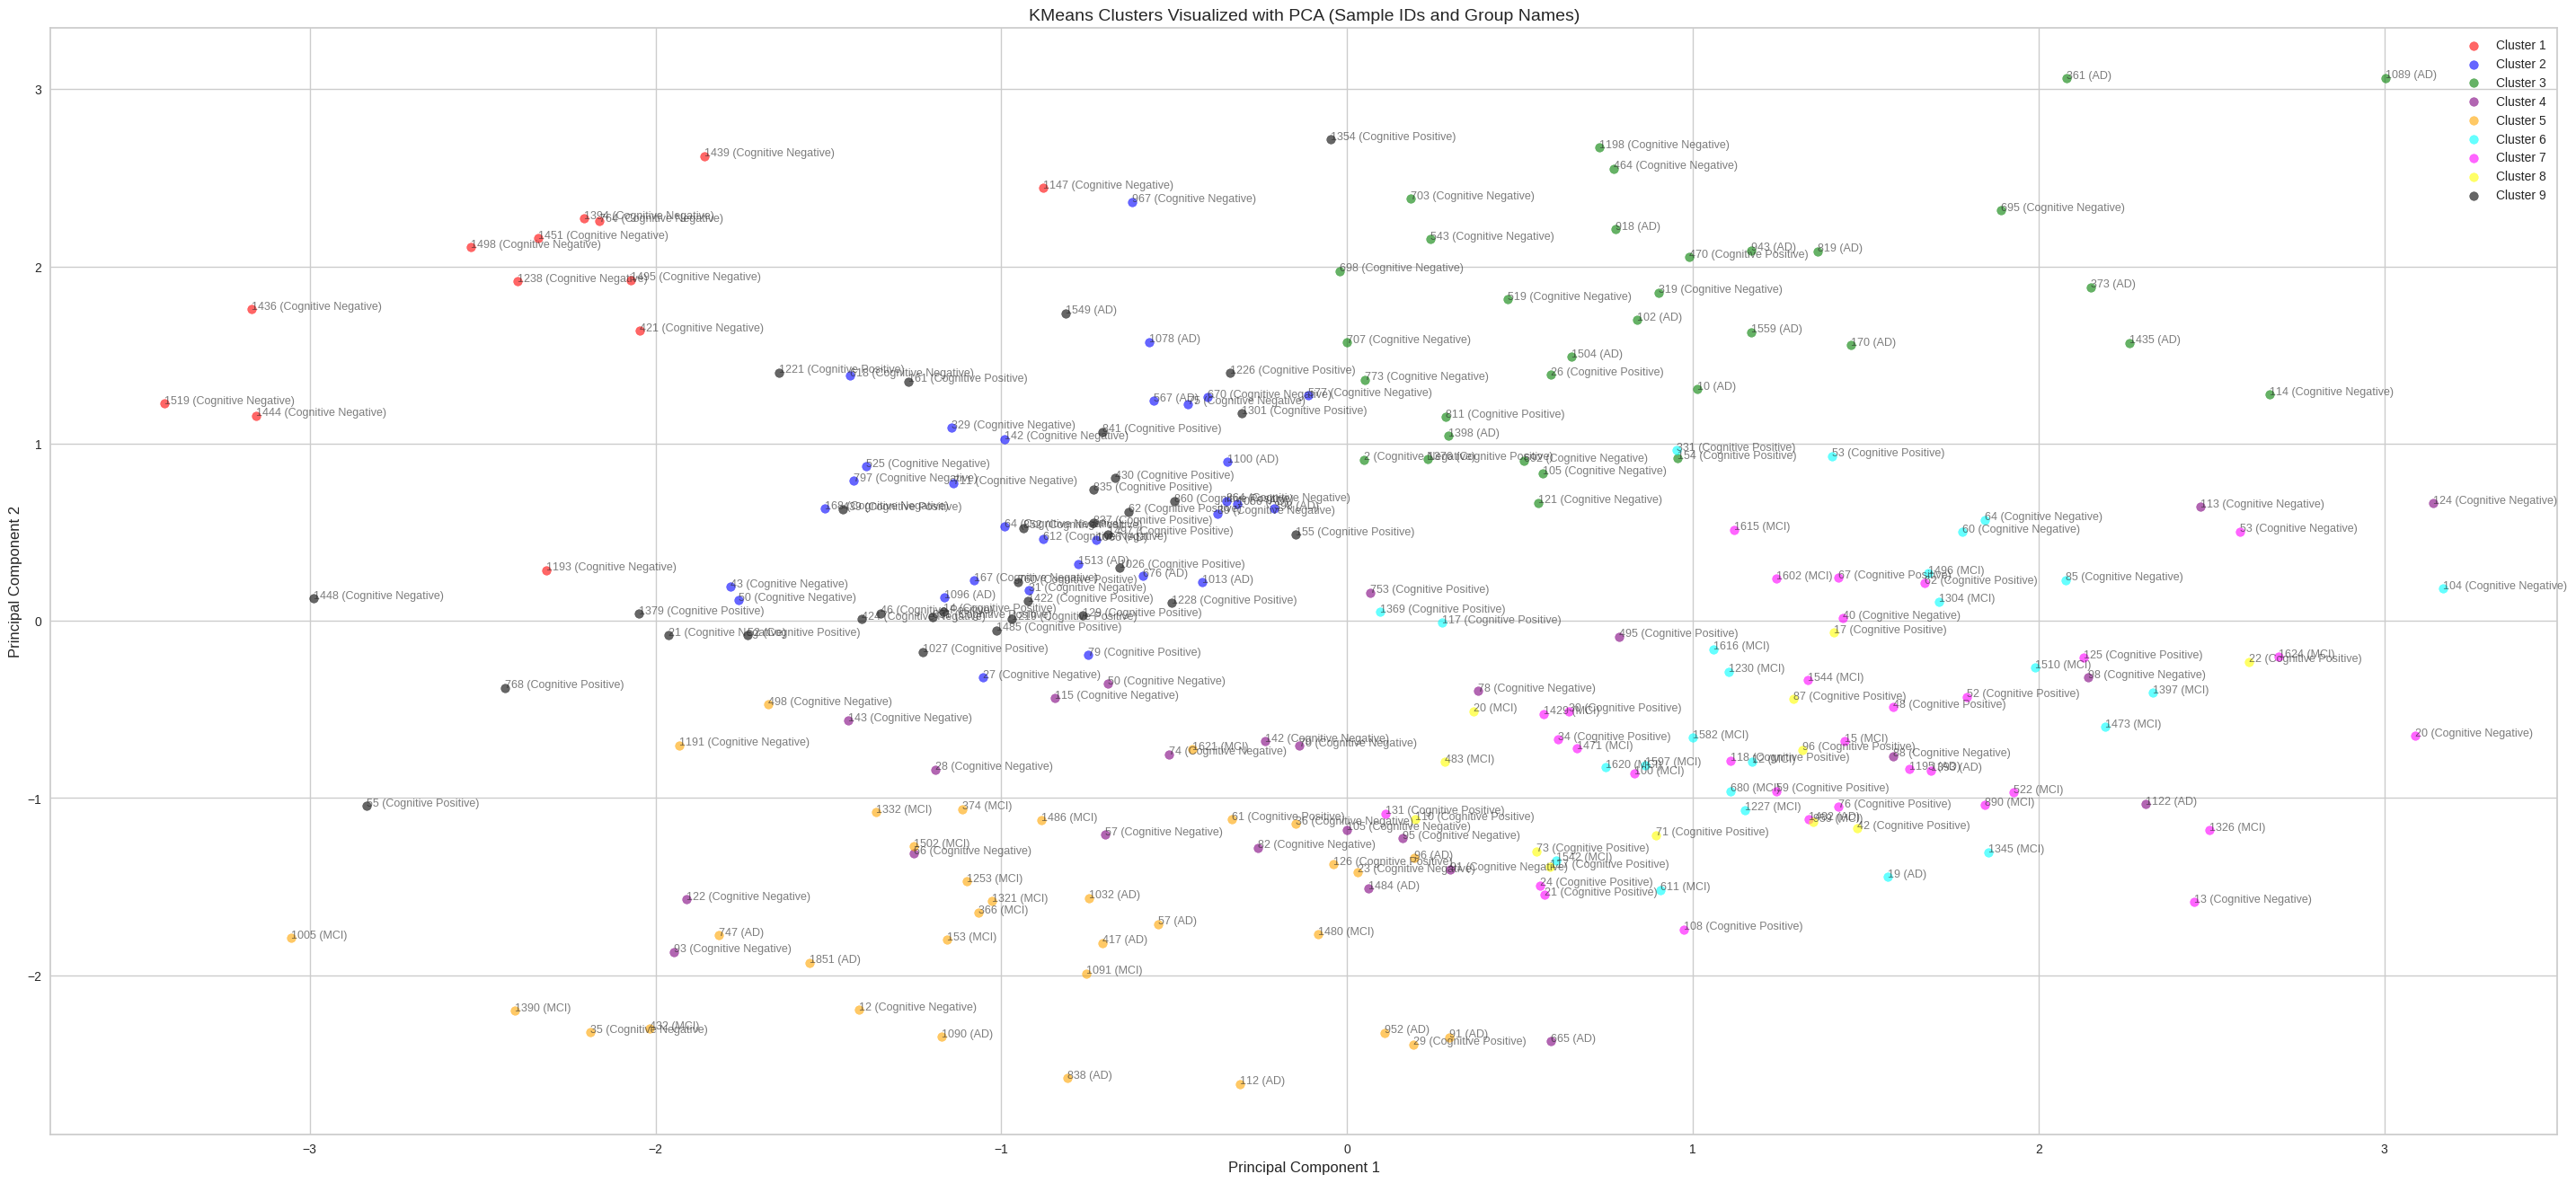

In [ ]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Extract Sample IDs and Group Names (Ensure they are strings)
sample_ids = data['Sample ID'].astype(str).values
group_names = data['Group'].astype(str).values

# Plot PCA results with clusters
plt.figure(figsize=(36, 16))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black']

for cluster in range(best_k):
    cluster_indices = np.where(data['Cluster'] == cluster)
    plt.scatter( pca_features[cluster_indices, 0], pca_features[cluster_indices, 1],  color=colors[cluster], label=f"Cluster {cluster+1}", alpha=0.6)

# Annotate points with Sample ID & Group Name
for i, txt in enumerate(sample_ids):
    label = f"{txt} ({group_names[i]})"
    plt.annotate(label, (pca_features[i, 0], pca_features[i, 1]), fontsize=9, alpha=0.6)


plt.title("KMeans Clusters Visualized with PCA (Sample IDs and Group Names)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.show()